In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#data = df.iloc[:,0:17]
#data.to_csv("zom_data.csv")

In [5]:
#data = pd.read_csv('zom_data.csv')

In [6]:
zomato=pd.read_csv("zomato.csv",encoding="latin-1",usecols=range(17))

In [7]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56250 entries, 0 to 56249
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          56200 non-null  object
 1   address                      56235 non-null  object
 2   name                         56236 non-null  object
 3   online_order                 56234 non-null  object
 4   book_table                   56194 non-null  object
 5   rate                         48414 non-null  object
 6   votes                        56174 non-null  object
 7   phone                        54956 non-null  object
 8   location                     56128 non-null  object
 9   rest_type                    55914 non-null  object
 10  dish_liked                   28049 non-null  object
 11  cuisines                     56049 non-null  object
 12  approx_cost(for two people)  55745 non-null  object
 13  reviews_list                 56

In [8]:
zomato.shape

(56250, 17)

In [9]:
zomato.isnull().mean()*100

url                             0.088889
address                         0.026667
name                            0.024889
online_order                    0.028444
book_table                      0.099556
rate                           13.930667
votes                           0.135111
phone                           2.300444
location                        0.216889
rest_type                       0.597333
dish_liked                     50.135111
cuisines                        0.357333
approx_cost(for two people)     0.897778
reviews_list                    0.332444
menu_item                       8.117333
listed_in(type)                 8.168889
listed_in(city)                 8.220444
dtype: float64

In [10]:
zomato.duplicated().sum()

214

In [11]:
zomato.drop_duplicates(inplace=True)

In [12]:
zomato.loc[zomato['dish_liked'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
20,https://www.zomato.com/bangalore/360-atoms-res...,"47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...",360 Atoms Restaurant And Cafe,Yes,No,3.1/5,13,+91 9880594520,Banashankari,Cafe,NaN,"Cafe, Chinese, Continental, Italian",400,"[('Rated 5.0', 'RATED\n Friendly staffs , nic...",[],Cafes,Banashankari
23,https://www.zomato.com/bangalore/cafe-coffee-d...,"SRF Complex, Near BDA Complex, Kathreguppe Mai...",Cafe Coffee Day,No,No,3.6/5,28,080 32486296,Banashankari,Cafe,NaN,"Cafe, Fast Food",900,"[('Rated 4.0', 'RATED\n This outlet is better...",[],Cafes,Banashankari
25,https://www.zomato.com/bangalore/hide-out-cafe...,"775/1, Opposite Gupta Collage, 7th Block, 3rd ...",Hide Out Cafe,No,No,3.7/5,31,+91 9901481185,Banashankari,Cafe,NaN,Cafe,300,"[('Rated 4.0', 'RATED\n The food was quite go...",[],Cafes,Banashankari
26,https://www.zomato.com/bangalore/cafe-nova-ban...,"101, Water Tank Road, 2nd Block, 3rd Stage, Ba...",CAFE NOVA,No,No,3.2/5,11,+91 8971090261,Banashankari,Cafe,NaN,"Cafe, Bakery",600,"[('Rated 1.0', ""RATED\n No ventilation. Smoke...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56243,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,NaN,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
56245,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
56246,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
56247,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield


In [13]:
zomato.drop(['dish_liked'], axis=1, inplace=True)

In [14]:
zomato.reset_index(inplace=True, drop = True)

In [15]:
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [16]:
zomato.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


# FEATURE CLEANSING

In [17]:
zomato_copy = zomato.copy()

In [18]:
# book_table, cost, rate, votes

In [19]:
a=[]
for i,j in enumerate(zomato["book_table"]):
    if j=="Yes" or j=="No":
        pass
    else:
        a.append(i)

In [20]:
a

[9,
 33,
 37,
 42,
 49,
 63,
 67,
 81,
 215,
 258,
 319,
 363,
 408,
 419,
 432,
 434,
 493,
 499,
 501,
 578,
 590,
 609,
 618,
 681,
 719,
 795,
 833,
 891,
 906,
 917,
 940,
 972,
 998,
 1023,
 1029,
 1033,
 1052,
 1061,
 1067,
 1070,
 1076,
 1084,
 1112,
 1144,
 1173,
 1213,
 1219,
 1288,
 1298,
 1318,
 1345,
 1461,
 1517,
 1545,
 1570,
 1575,
 1589,
 1606,
 1621,
 1633,
 1733,
 1735,
 1739,
 1759,
 1769,
 1801,
 1803,
 2008,
 2045,
 2047,
 2067,
 2075,
 2095,
 2104,
 2116,
 2120,
 2162,
 2169,
 2195,
 2212,
 2228,
 2323,
 2327,
 2329,
 2338,
 2364,
 2391,
 2395,
 2406,
 2435,
 2492,
 2529,
 2555,
 2558,
 2564,
 2566,
 2569,
 2585,
 2594,
 2606,
 2609,
 2616,
 2689,
 2708,
 2734,
 2756,
 2760,
 2823,
 2835,
 2848,
 2878,
 2922,
 2933,
 2935,
 2939,
 3006,
 3017,
 3043,
 3069,
 3073,
 3118,
 3137,
 3144,
 3206,
 3347,
 3354,
 3464,
 3472,
 3497,
 3574,
 3582,
 3586,
 3589,
 3592,
 3614,
 3619,
 3621,
 3625,
 3655,
 3682,
 3744,
 3889,
 3902,
 3906,
 3917,
 3919,
 3939,
 3943,
 3947,

In [21]:
zomato_new=zomato.drop(a,axis=0)

In [22]:
zomato_new['book_table'].value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

In [23]:
zomato_new.reset_index(drop=True,inplace=True)

In [24]:
zomato_new["cost"].unique()

array(['800', '300', '600', '700+', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '10,00', '12,00', '1500+', '1,300', '350+', '1,000', '199',
       '1,500', '80', '1,100', '160', '1,600', '700', '230', '130', '50',
       '190', '1,700', nan, '1,400', '180', '1,350', '2,200', '2,000',
       '1,800', '1,900', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '28,00', '120', '1,450', '469', '70', '3,200', '60', '560', '240',
       '360', '6,000', '1,050', '2,300', '4,100', '5,000', '3,700',
       '1,650', '2,700', '4,500', '140'], dtype=object)

In [25]:
zomato_new["cost"]=zomato_new["cost"].astype(str)
zomato_new["cost"]=zomato_new["cost"].apply(lambda x:x.replace(',',''))
zomato_new["cost"]=zomato_new["cost"].apply(lambda x:x.replace('+',''))

In [26]:
zomato_new["cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [27]:
zomato_new['rate'].value_counts()

NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

In [28]:
#zomato_new["rate"]=[i[0:3] for i in zomato_new["rate"]]

In [29]:
zomato_new["rate"]=zomato_new["rate"].astype(str)

In [30]:
zomato_new["rate"]=[i[0:3] for i in zomato_new["rate"]]

In [31]:
zomato_new["rate"].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '-', '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [32]:
zomato_new["rate"]=zomato_new["rate"].replace("-","NEW")

In [33]:
zomato_new["votes"].unique()

array(['775', '787', '918', ..., '4957', '2382', '843'], dtype=object)

In [34]:
zomato_new["votes"]=zomato_new["votes"].replace(',',"")

In [35]:
for i,j in  enumerate(zomato_new["votes"]):
    try:
        if "," in j:
            print(i,j)
    except:
        pass

1372 1,000


In [36]:
for i,j in  enumerate(zomato_new["votes"]):
    try:
        if "," in j:
            zomato_new["votes"][i]=j.replace(",","")
            
    except:
        continue

In [37]:
zomato_new["votes"][1372]

'1000'

In [38]:
zomato_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           51717 non-null  object
 1   address       51717 non-null  object
 2   name          51717 non-null  object
 3   online_order  51717 non-null  object
 4   book_table    51717 non-null  object
 5   rate          51717 non-null  object
 6   votes         51717 non-null  object
 7   phone         50509 non-null  object
 8   location      51696 non-null  object
 9   rest_type     51490 non-null  object
 10  cuisines      51672 non-null  object
 11  cost          51717 non-null  object
 12  reviews_list  51717 non-null  object
 13  menu_item     47356 non-null  object
 14  type          47356 non-null  object
 15  city          47356 non-null  object
dtypes: object(16)
memory usage: 6.3+ MB


In [39]:
zomato_new.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,"+91 8026612447\r\n+91 990121,0005",Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [40]:
zomato_new["online_order"].value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

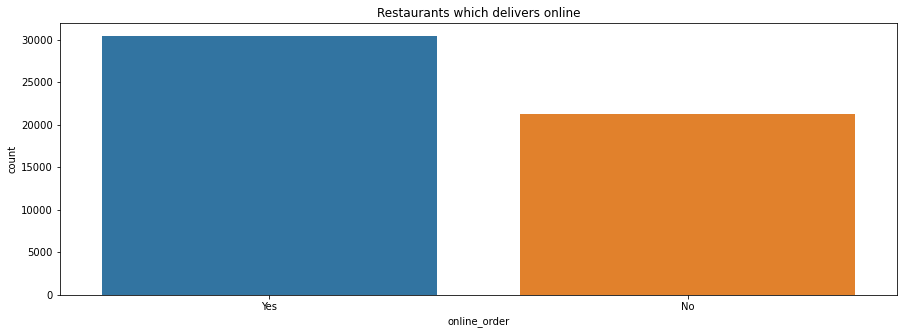

In [43]:
a=plt.figure(figsize=(15,5))
sns.countplot(zomato_new['online_order'])
plt.title('Restaurants which delivers online')
plt.show()

In [44]:
zomato_new1=zomato_new.loc[~(zomato_new["rate"]=="NEW")]

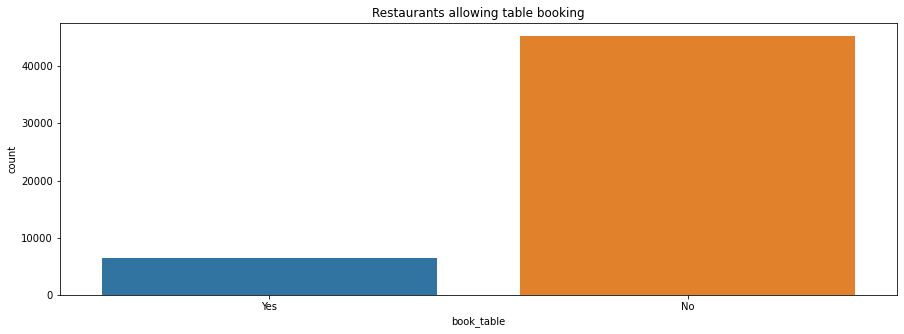

In [45]:
b=plt.figure(figsize=(15,5))
sns.countplot(zomato_new['book_table'])
plt.title('Restaurants allowing table booking')
plt.show()

In [46]:
zomato_new1=zomato_new.loc[~(zomato_new["rate"]=="NEW")]

In [47]:
Y = pd.crosstab(zomato_new1['rate'], zomato_new1['book_table'])

In [48]:
Y

book_table,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,24,0
2.2,13,13
2.3,51,0
2.4,70,0
2.5,99,2
2.6,256,4
2.7,303,4


In [52]:
zomato_new1['rate'].value_counts()

nan    7775
3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
4.2    2184
3.2    1873
4.3    1693
3.1    1561
4.4    1147
3.0    1023
2.9     802
4.5     656
2.8     600
2.7     307
4.6     300
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: rate, dtype: int64

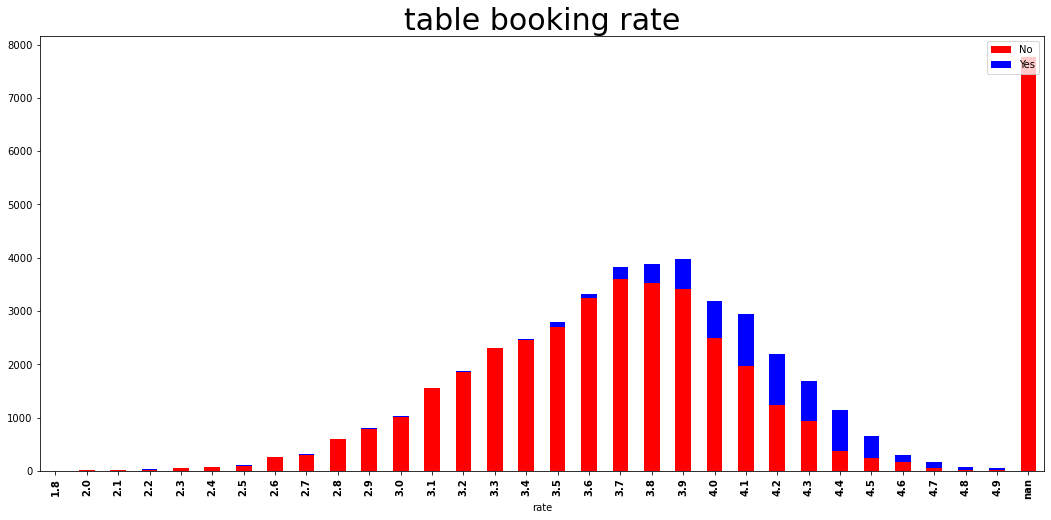

In [49]:
Y.plot(kind = 'bar', stacked = True,color=['RED','BLUE'],figsize=(18,8))
plt.title('table booking rate', fontweight = 30, fontsize = 30)
plt.xticks(fontsize=10,fontweight='bold')
plt.legend(loc="upper right")
plt.show()

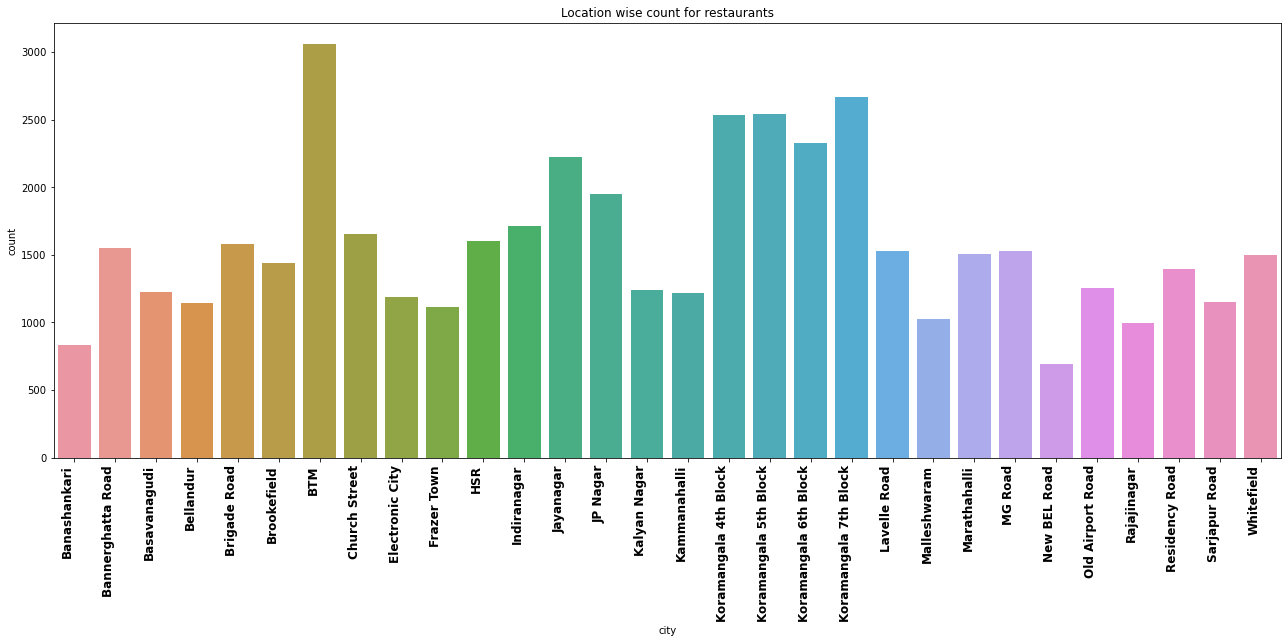

In [53]:
d=plt.figure(figsize=(22,8))
sns.countplot(zomato_new['city'])
sns.countplot(zomato_new['city']).set_xticklabels(sns.countplot(zomato_new['city']).get_xticklabels(), rotation=90, ha="right")
plt.xticks(fontsize=12,fontweight='bold')
plt.title('Location wise count for restaurants')
plt.show()

In [54]:
zomato_new1['city'].value_counts()

BTM                      2895
Koramangala 7th Block    2550
Koramangala 4th Block    2430
Koramangala 5th Block    2417
Koramangala 6th Block    2188
Jayanagar                2146
JP Nagar                 1818
Church Street            1597
Indiranagar              1594
Brigade Road             1523
Lavelle Road             1486
HSR                      1486
MG Road                  1484
Marathahalli             1456
Whitefield               1448
Bannerghatta Road        1432
Residency Road           1359
Brookefield              1326
Old Airport Road         1203
Kammanahalli             1173
Kalyan Nagar             1158
Basavanagudi             1153
Sarjapur Road            1115
Frazer Town              1073
Electronic City          1067
Bellandur                1067
Malleshwaram              997
Rajajinagar               973
Banashankari              796
New BEL Road              681
Name: city, dtype: int64

In [55]:
loc_plt=pd.crosstab(zomato_new1['rate'],zomato_new1['city'])
loc_plt

city,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,HSR,Indiranagar,JP Nagar,Jayanagar,Kalyan Nagar,Kammanahalli,Koramangala 4th Block,Koramangala 5th Block,Koramangala 6th Block,Koramangala 7th Block,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
rate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2,0,0,0,2,0,0
2.1,0,0,0,0,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0
2.2,0,0,2,0,1,3,3,3,0,1,0,2,1,0,0,0,0,0,0,0,2,3,0,0,0,0,0,2,0,0
2.3,3,0,2,0,2,1,2,1,0,0,3,0,3,0,1,0,1,2,1,1,2,1,2,0,0,0,2,3,2,0
2.4,2,0,3,0,1,0,6,0,2,1,5,6,2,0,1,2,1,2,0,2,0,0,2,8,0,7,2,0,1,0
2.5,6,1,2,2,1,4,0,4,5,3,2,5,2,6,0,0,3,3,4,4,4,3,2,1,2,3,0,4,1,8
2.6,18,3,12,7,9,4,9,3,2,2,16,5,13,11,5,5,11,11,10,11,5,4,5,13,2,3,2,7,8,8
2.7,18,6,14,11,4,5,13,5,12,7,6,11,13,18,10,9,11,9,8,12,3,6,11,9,4,10,6,1,12,11
2.8,29,6,10,13,16,19,36,17,20,11,23,29,15,18,7,11,31,23,27,19,18,20,9,30,7,26,8,17,20,22


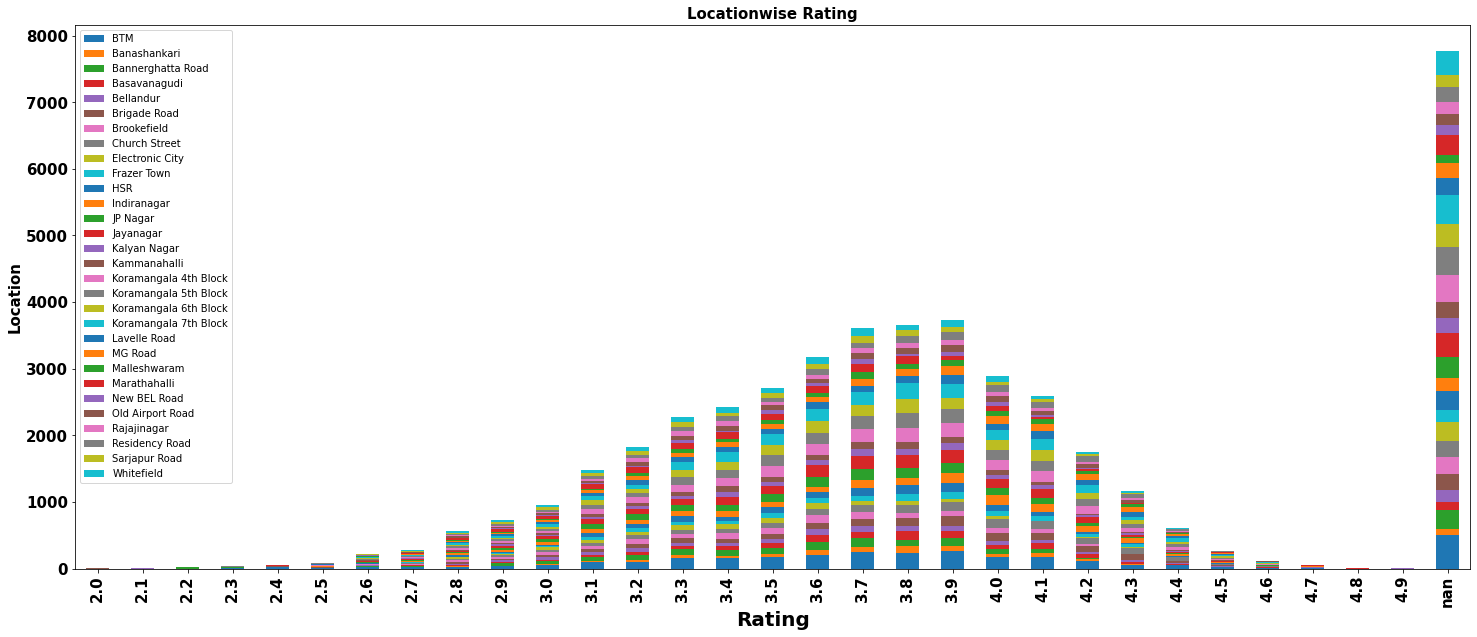

In [56]:
loc_plt.plot(kind='bar',stacked=True,figsize=(25,10));
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=15,fontweight='bold')
plt.xlabel('Rating',fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(loc="best");

In [57]:
top_10=[i for i in zomato_new1["rest_type"].value_counts().head(10).index]

In [59]:
zomato_top10=zomato_new.loc[zomato_new["rest_type"].isin(top_10)]

In [60]:
zomato_top10["rest_type"].value_counts()

Quick Bites           19132
Casual Dining         10330
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Beverage Shop           867
Bar                     697
Name: rest_type, dtype: int64

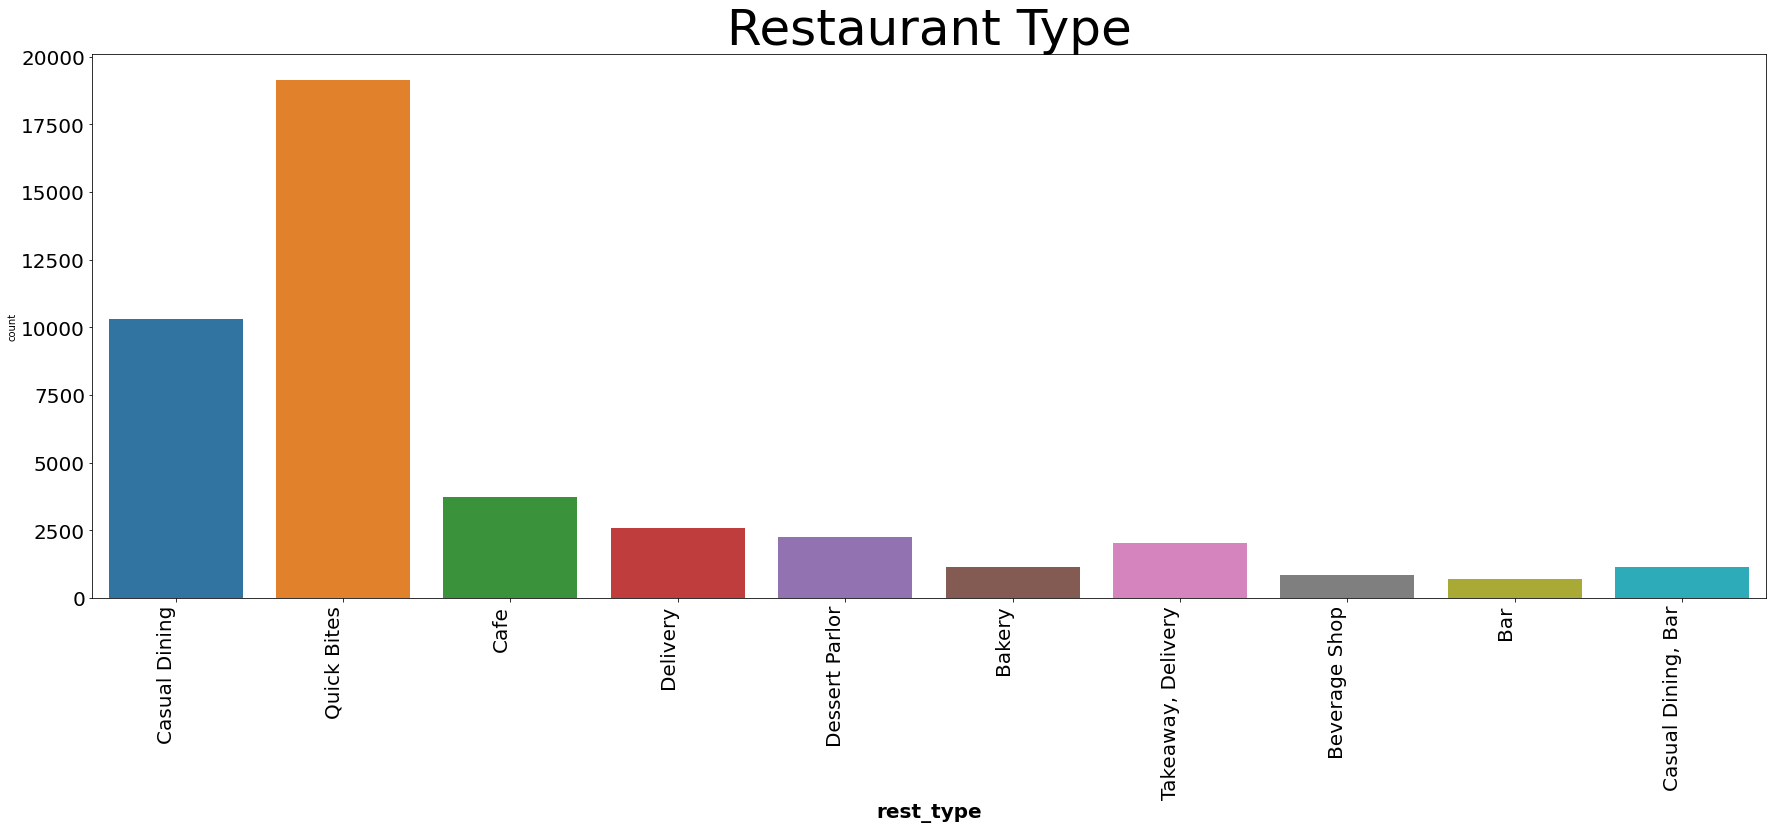

In [70]:
plt.figure(figsize=(30,10))

sns.countplot(zomato_top10['rest_type']).set_xticklabels(sns.countplot(zomato_top10['rest_type']).get_xticklabels(), rotation=90, ha="right")
plt.xlabel('rest_type',fontsize=20,fontweight='bold')
plt.title('Restaurant Type',fontsize=50)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

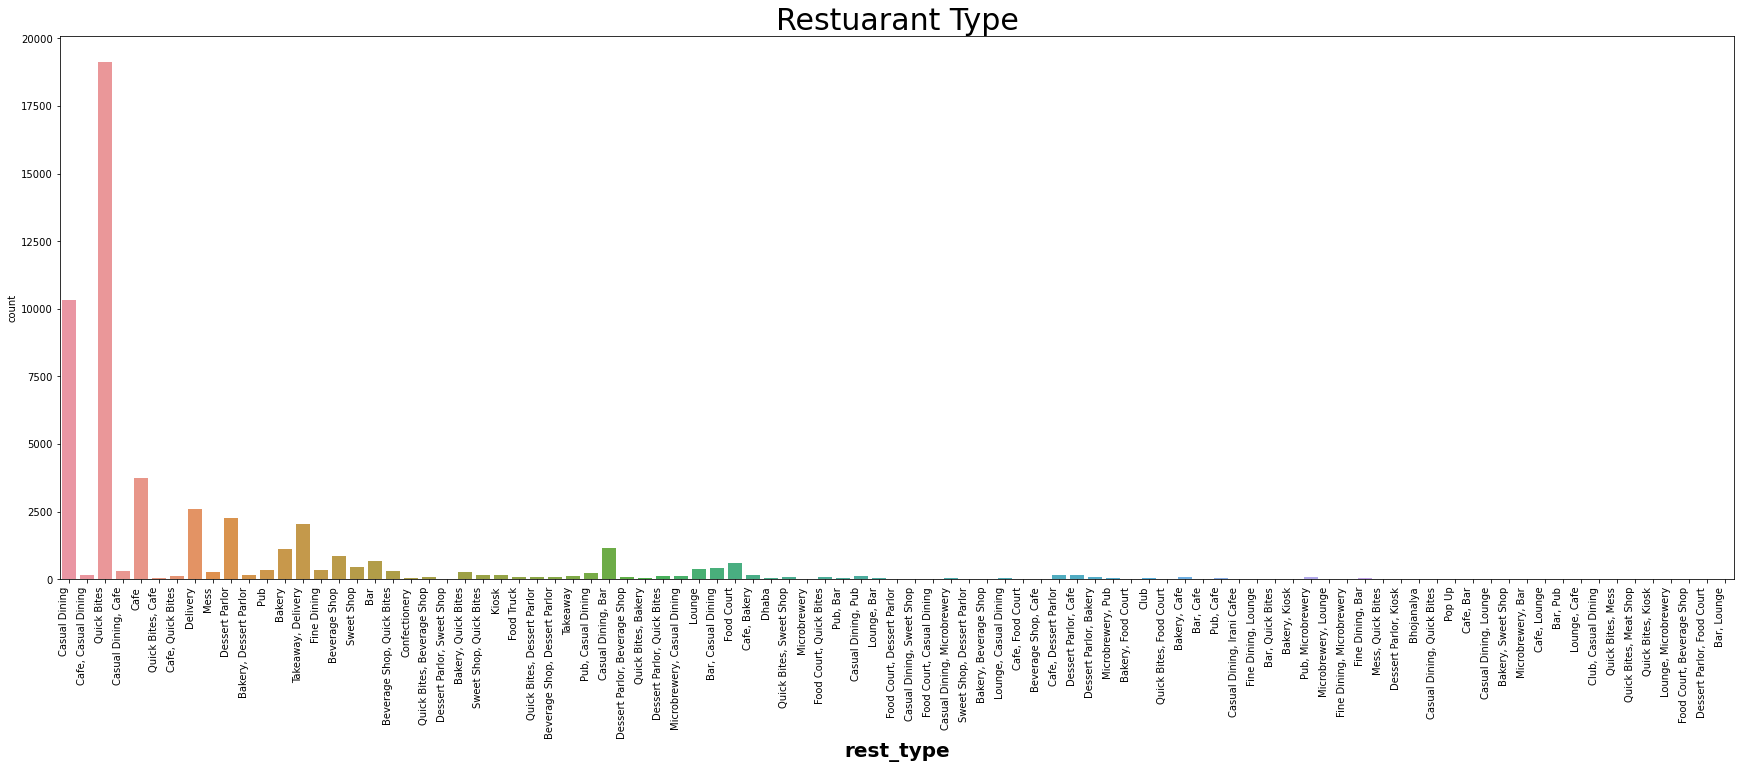

In [71]:
plt.figure(figsize=(30,10))
sns.countplot(zomato_new['rest_type'])
sns.countplot(zomato_new['rest_type']).set_xticklabels(sns.countplot(zomato_new['rest_type']).get_xticklabels(), rotation=90, ha="right")
plt.xlabel('rest_type',fontsize=20,fontweight='bold')
plt.title('Restuarant Type',fontsize=30)
plt.show()

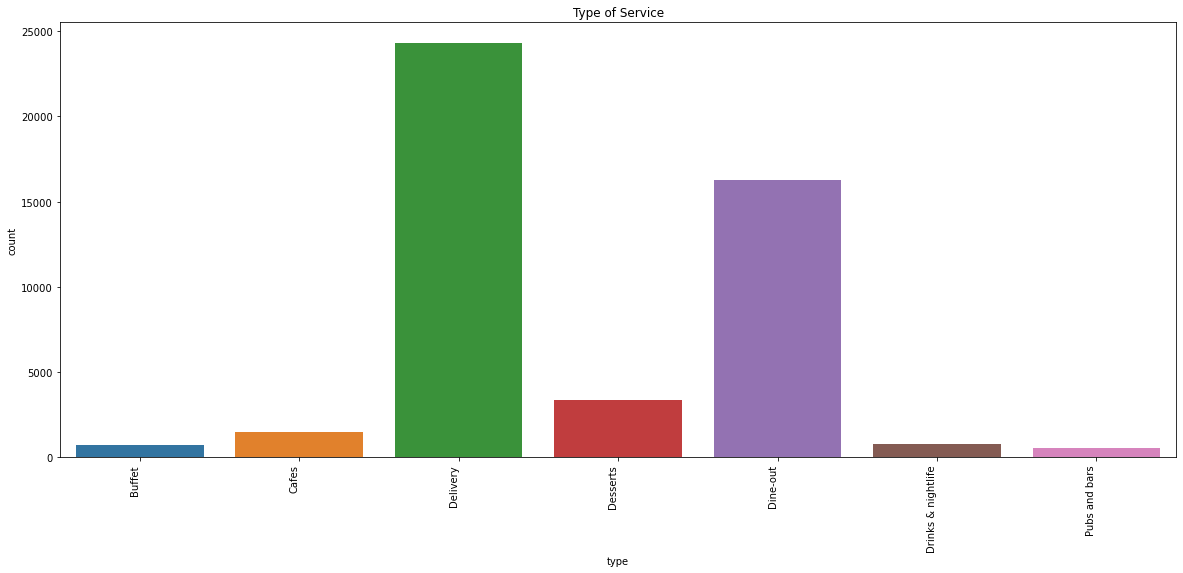

In [72]:
plt.figure(figsize=(20,8))
sns.countplot(zomato_new['type'])
sns.countplot(zomato_new['type']).set_xticklabels(sns.countplot(zomato_new['type']).get_xticklabels(), rotation=90, ha="right")
plt.title('Type of Service')
plt.show()

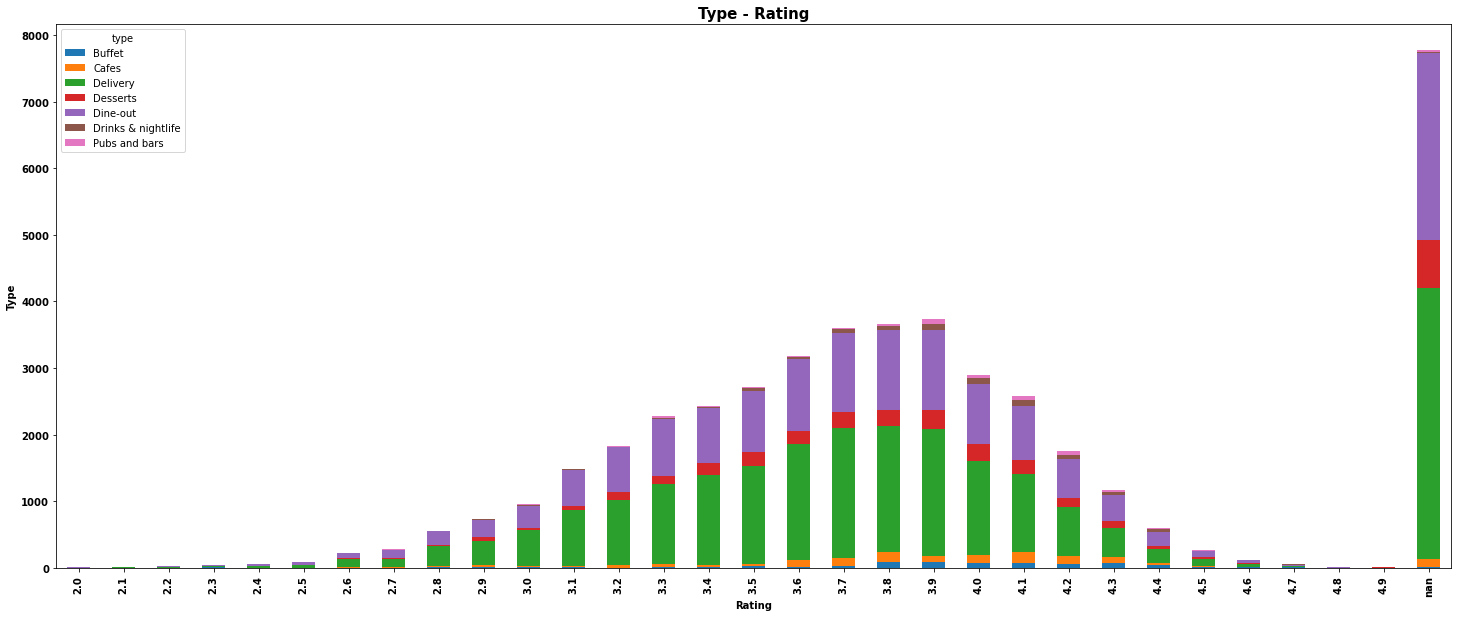

In [73]:
type_plt=pd.crosstab(zomato_new1['rate'],zomato_new1['type'])

type_plt.plot(kind='bar',stacked=True,figsize=(25,10))
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')

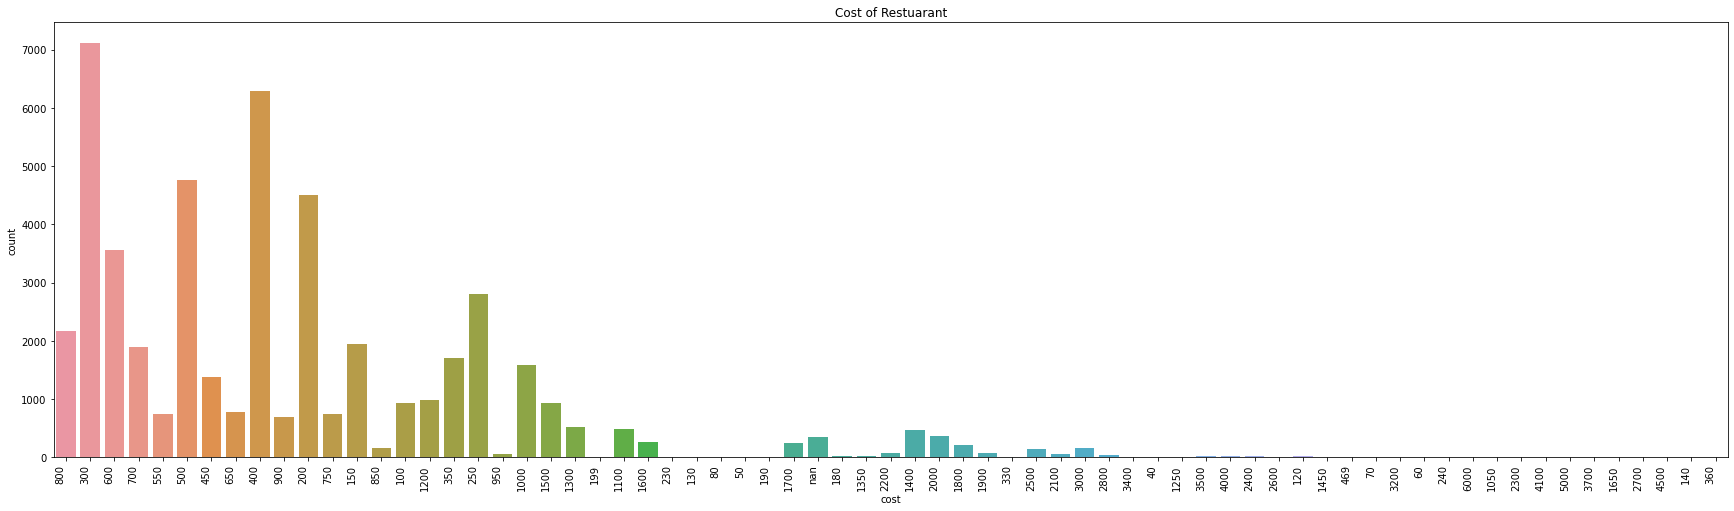

In [74]:
plt.figure(figsize=(30,8))
sns.countplot(zomato_new1['cost'])
sns.countplot(zomato_new1['cost']).set_xticklabels(sns.countplot(zomato_new1['cost']).get_xticklabels(), rotation=90, ha="right")
plt.title('Cost of Restuarant')
plt.show()

Text(0.5, 1.0, 'NO. of restaurants in a Location')

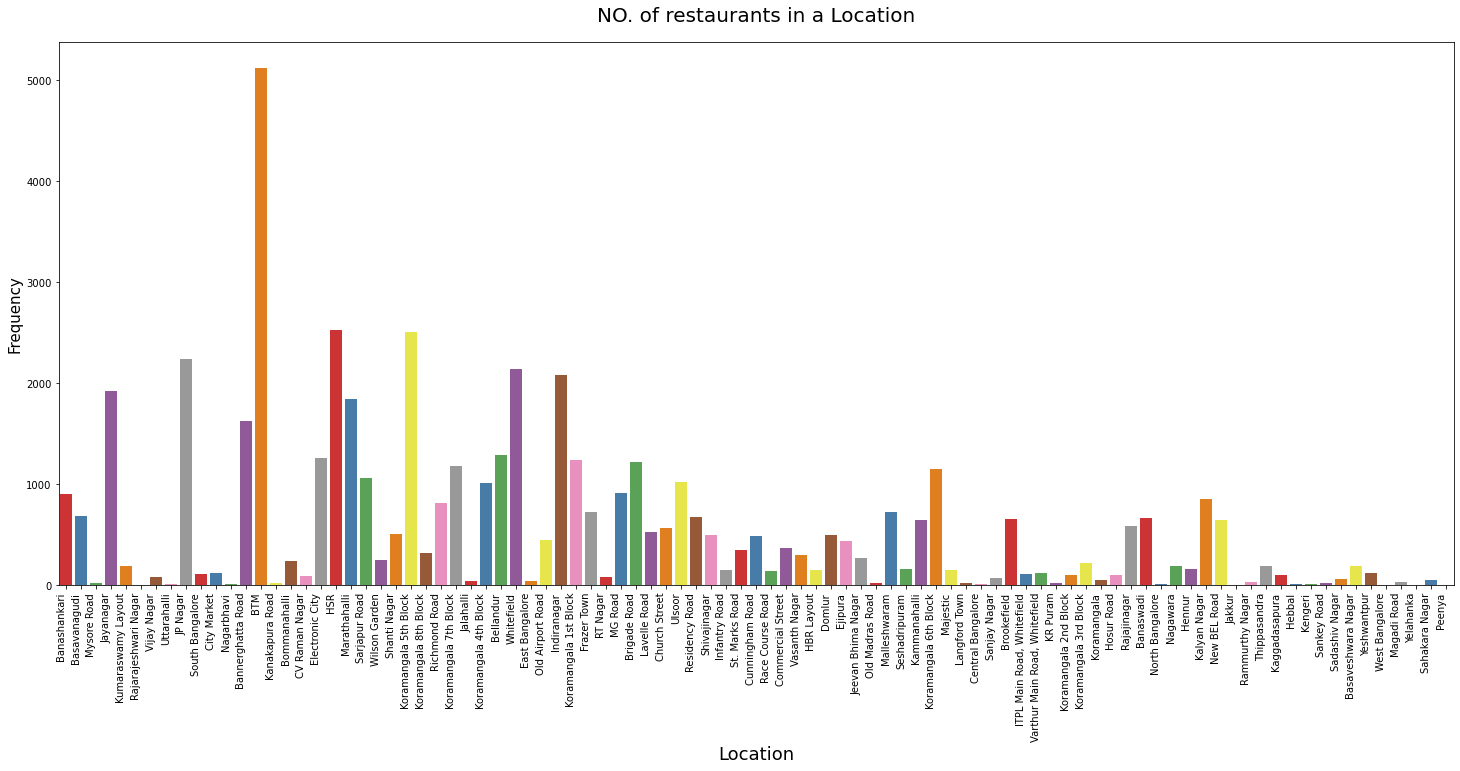

In [75]:
fig = plt.figure(figsize=(25,10))
loc = sns.countplot(x="location",data=zomato_new, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

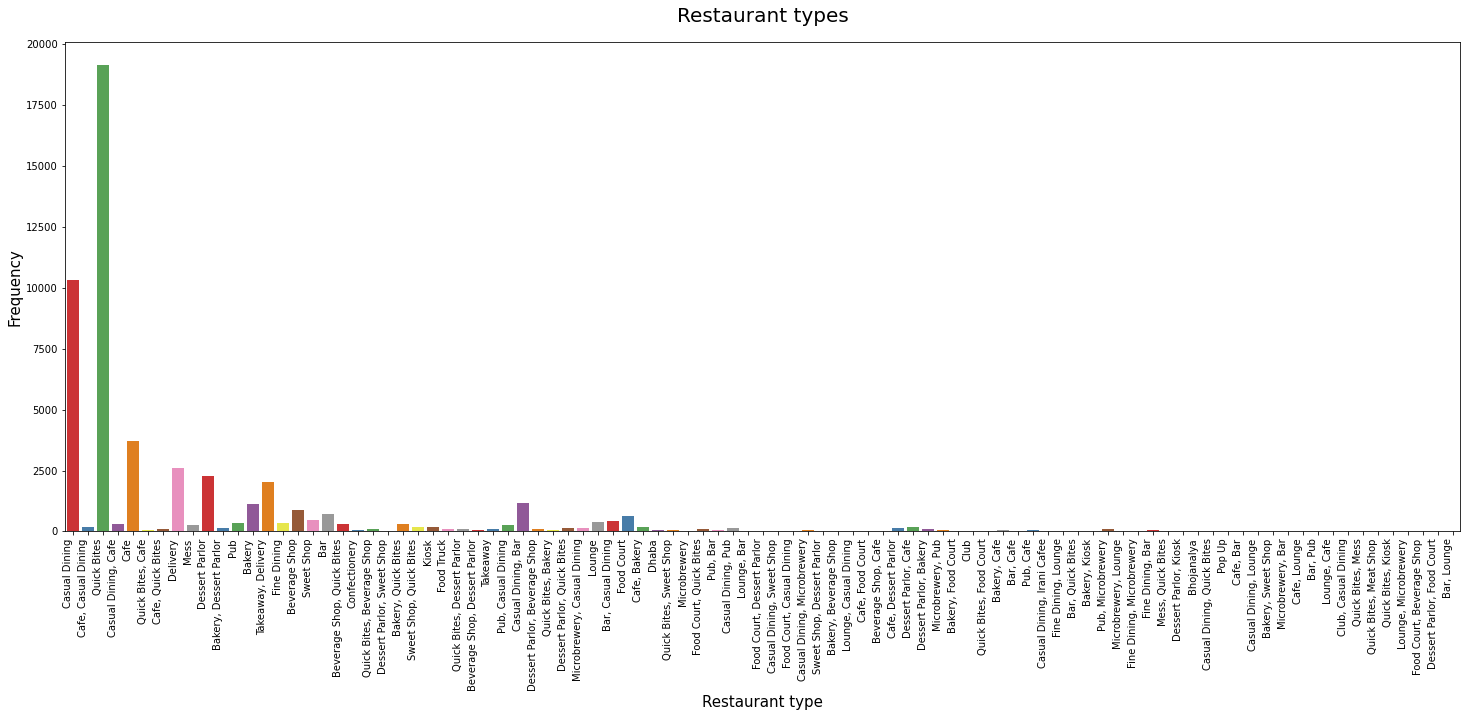

In [76]:
fig = plt.figure(figsize=(25,9))
rest = sns.countplot(x="rest_type",data=zomato_new, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)

plt.title('Restaurant types',fontsize = 20 ,pad=20)
plt.show()

In [77]:
zomato_new1['name'].value_counts().head(20)

Cafe Coffee Day      93
Onesta               85
Just Bake            72
Five Star Chicken    70
Empire Restaurant    69
Kanti Sweets         68
Baskin Robbins       63
Polar Bear           62
Chef Baker's         62
Petoo                62
KFC                  60
Pizza Hut            60
Subway               60
McDonald's           59
Domino's Pizza       59
Smoor                59
Sweet Truth          58
Chai Point           58
Faasos               56
Beijing Bites        56
Name: name, dtype: int64

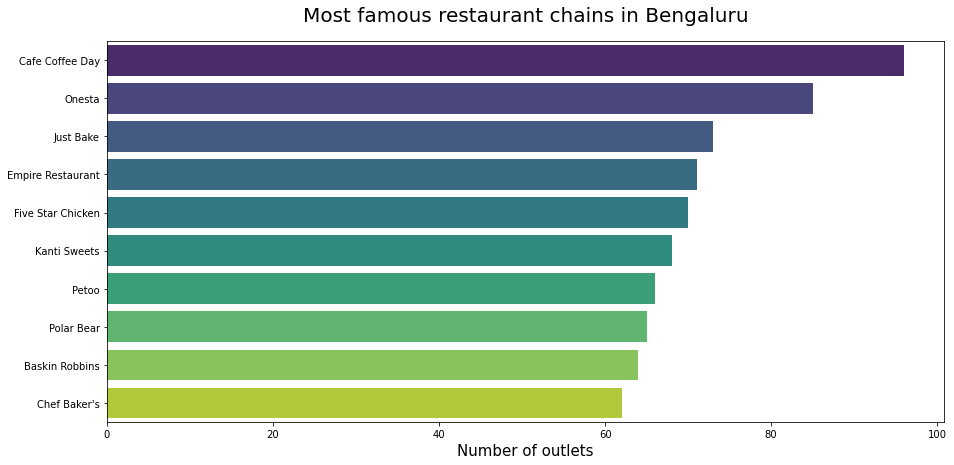

In [78]:
plt.figure(figsize=(15,7))
chains=zomato_new['name'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index,palette='viridis')
plt.title("Most famous restaurant chains in Bengaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)
plt.show()

In [79]:
zomato_new=zomato_new.drop(['url','phone','address','reviews_list','menu_item','location'],axis=1)

In [80]:
zomato_new["cuisines"].value_counts()

North Indian                                   2913
North Indian, Chinese                          2385
South Indian                                   1828
Biryani                                         918
Bakery, Desserts                                911
                                               ... 
North Indian, Chinese, South Indian, Juices       1
North Indian, Chinese, Kebab, Mughlai             1
Chinese, Vietnamese, Thai, Malaysian              1
Arabian, Lebanese, Chinese, Rolls                 1
North Indian, Chinese, Arabian, Momos             1
Name: cuisines, Length: 2723, dtype: int64

In [81]:
zomato_new["cuisines"]=zomato_new["cuisines"].apply(lambda x: x.split(",") if type(x)!=float else np.nan)

In [82]:
zomato_new["new_cuisines"]=1

In [83]:
zomato_new.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city,new_cuisines
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"[North Indian, Mughlai, Chinese]",800,Buffet,Banashankari,1
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"[Chinese, North Indian, Thai]",800,Buffet,Banashankari,1
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","[Cafe, Mexican, Italian]",800,Buffet,Banashankari,1
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"[South Indian, North Indian]",300,Buffet,Banashankari,1
4,Grand Village,No,No,3.8,166,Casual Dining,"[North Indian, Rajasthani]",600,Buffet,Banashankari,1


In [84]:
zomato_new["cuisines"][0][1]

' Mughlai'

In [85]:
zomato_new.isnull().sum()

name               0
online_order       0
book_table         0
rate               0
votes              0
rest_type        227
cuisines          45
cost               0
type            4361
city            4361
new_cuisines       0
dtype: int64

In [86]:
we=[]
df=pd.DataFrame()
j=0
for i,j in enumerate(zomato_new["cuisines"]):
    if type(j)!=float:
        continue
    else:
        we.append(i)

In [87]:
we

[438,
 440,
 759,
 1662,
 4037,
 6887,
 6897,
 7277,
 7555,
 9874,
 13591,
 13693,
 16351,
 22236,
 22974,
 23385,
 23399,
 24725,
 26186,
 26432,
 26519,
 27672,
 28611,
 29298,
 30604,
 31400,
 32131,
 33457,
 34755,
 39171,
 40354,
 40556,
 40625,
 40640,
 40977,
 41980,
 43169,
 45813,
 46586,
 46609,
 46752,
 47134,
 50355,
 50439,
 50755]

In [88]:
zomato_new.iloc[438]

name            The House Of Vadapav
online_order                     Yes
book_table                        No
rate                             nan
votes                              0
rest_type                Quick Bites
cuisines                         NaN
cost                             150
type                        Delivery
city                    Banashankari
new_cuisines                       1
Name: 438, dtype: object

In [89]:
zomato_new1=zomato_new.copy()

In [90]:
zomato_new1=zomato_new1.drop(we,axis=0)

In [91]:
zomato_new1.reset_index(drop=True,inplace=True)

for i in zomato_new1['cost']:
    try:
        zomato_new1['cost'] = zomato_new1['cost'].astype(int)
        continue
    except Exception as e:
        print(e)

In [92]:
zomato_new1.loc[zomato_new1['cost']=='nan']

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city,new_cuisines
1764,Innate,No,No,nan,0,Delivery,[Beverages],nan,Delivery,Bannerghatta Road,1
1791,Super Chef's (New Royal treat),No,No,nan,0,Quick Bites,"[North Indian, Chinese, South Indian]",nan,Delivery,Bannerghatta Road,1
3065,Super Chef's (New Royal treat),No,No,NEW,0,Quick Bites,"[North Indian, Chinese, South Indian]",nan,Delivery,Basavanagudi,1
3770,The Hub - Ibis Bengaluru,No,No,3.9,237,Bar,[Finger Food],nan,Buffet,Bellandur,1
3950,North Indian Kitchen,No,No,3.2,13,Takeaway,[North Indian],nan,Delivery,Bellandur,1
...,...,...,...,...,...,...,...,...,...,...,...
50895,Cinnabon,No,No,4.0,80,Quick Bites,"[Beverages, American, Bakery]",nan,Desserts,Whitefield,1
51188,Mayas kitchen,No,No,nan,0,Casual Dining,"[South Indian, Chinese, Chettinad]",nan,Dine-out,Whitefield,1
51202,Mast Kalandar,No,No,2.6,76,Casual Dining,[North Indian],nan,NaN,NaN,1
51226,Karavalli Food Court,No,No,3.2,4,Casual Dining,[South Indian],nan,Dine-out,Whitefield,1


In [ ]:
#df.to_csv('df_zom.csv')

In [94]:
df=pd.read_csv('df_zom.csv')

In [102]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city,new_cuisines
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"['North Indian', ' Mughlai', ' Chinese']",800.0,Buffet,Banashankari,North Indian
1,Jalsa,Yes,Yes,4.1,775,Casual Dining,"['North Indian', ' Mughlai', ' Chinese']",800.0,Buffet,Banashankari,Mughlai
2,Jalsa,Yes,Yes,4.1,775,Casual Dining,"['North Indian', ' Mughlai', ' Chinese']",800.0,Buffet,Banashankari,Chinese
3,Spice Elephant,Yes,No,4.1,787,Casual Dining,"['Chinese', ' North Indian', ' Thai']",800.0,Buffet,Banashankari,Chinese
4,Spice Elephant,Yes,No,4.1,787,Casual Dining,"['Chinese', ' North Indian', ' Thai']",800.0,Buffet,Banashankari,North Indian


In [101]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [103]:
df.shape

(126819, 11)

In [104]:
df.isna().sum()

name                0
online_order        0
book_table          0
rate            14933
votes               0
rest_type         501
cuisines            0
cost              756
type            13916
city            13916
new_cuisines        0
dtype: int64

In [105]:
data=df.copy()

In [106]:
data.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city,new_cuisines
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"['North Indian', ' Mughlai', ' Chinese']",800.0,Buffet,Banashankari,North Indian
1,Jalsa,Yes,Yes,4.1,775,Casual Dining,"['North Indian', ' Mughlai', ' Chinese']",800.0,Buffet,Banashankari,Mughlai
2,Jalsa,Yes,Yes,4.1,775,Casual Dining,"['North Indian', ' Mughlai', ' Chinese']",800.0,Buffet,Banashankari,Chinese
3,Spice Elephant,Yes,No,4.1,787,Casual Dining,"['Chinese', ' North Indian', ' Thai']",800.0,Buffet,Banashankari,Chinese
4,Spice Elephant,Yes,No,4.1,787,Casual Dining,"['Chinese', ' North Indian', ' Thai']",800.0,Buffet,Banashankari,North Indian


In [107]:
data.isna().sum()

name                0
online_order        0
book_table          0
rate            14933
votes               0
rest_type         501
cuisines            0
cost              756
type            13916
city            13916
new_cuisines        0
dtype: int64

In [108]:
data.drop(['cuisines', 'name'], axis=1, inplace=True)

In [109]:
data.head(2)

,online_order,book_table,rate,votes,rest_type,cost,type,city,new_cuisines
0,Yes,Yes,4.1,775,Casual Dining,800.0,Buffet,Banashankari,North Indian
1,Yes,Yes,4.1,775,Casual Dining,800.0,Buffet,Banashankari,Mughlai


In [110]:
data.shape

(126819, 9)

In [111]:
#rest_type

In [112]:
data['votes'] = data['votes'].astype(int)

In [113]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [114]:
data['rate']= data['rate'].replace('nan', np.nan)

In [115]:
data['rate']= data['rate'].replace('NEW', np.nan)

In [116]:
data.isna().sum()

online_order        0
book_table          0
rate            20352
votes               0
rest_type         501
cost              756
type            13916
city            13916
new_cuisines        0
dtype: int64

In [117]:
data['rate'] = data['rate'].astype(float)

In [118]:
data['rate_imputed'] = data['rate']           #(create another copy feature) 

 

data['rate_imputed'][data['rate_imputed'].isnull()] = data['rate'].dropna().sample(data['rate'].isnull().sum()).values 

 

In [119]:
data.drop(['rate'], axis=1, inplace = True)

In [120]:
data.shape

(126819, 9)

In [121]:
data.isna().sum()

online_order        0
book_table          0
votes               0
rest_type         501
cost              756
type            13916
city            13916
new_cuisines        0
rate_imputed        0
dtype: int64

In [122]:
data['cost']=data['cost'].astype(float)

In [123]:
data.isna().sum()

online_order        0
book_table          0
votes               0
rest_type         501
cost              756
type            13916
city            13916
new_cuisines        0
rate_imputed        0
dtype: int64

In [124]:
data['cost_imputed'] = data['cost']           #(create another copy feature) 

 

data['cost_imputed'][data['cost_imputed'].isnull()] = data['cost'].dropna().sample(data['cost'].isnull().sum()).values 

In [125]:
data.isna().sum()

online_order        0
book_table          0
votes               0
rest_type         501
cost              756
type            13916
city            13916
new_cuisines        0
rate_imputed        0
cost_imputed        0
dtype: int64

In [126]:
data.drop(['cost'], axis=1, inplace = True)

In [127]:
data['rest_type'].isna().sum()

501

In [128]:
data['rest_type'].dropna(axis=0, inplace=True)

In [129]:
data.reset_index(drop=True, inplace=True)

In [130]:
data.head()

,online_order,book_table,votes,rest_type,type,city,new_cuisines,rate_imputed,cost_imputed
0,Yes,Yes,775,Casual Dining,Buffet,Banashankari,North Indian,4.1,800.0
1,Yes,Yes,775,Casual Dining,Buffet,Banashankari,Mughlai,4.1,800.0
2,Yes,Yes,775,Casual Dining,Buffet,Banashankari,Chinese,4.1,800.0
3,Yes,No,787,Casual Dining,Buffet,Banashankari,Chinese,4.1,800.0
4,Yes,No,787,Casual Dining,Buffet,Banashankari,North Indian,4.1,800.0


In [131]:
data.isna().sum()

online_order        0
book_table          0
votes               0
rest_type         501
type            13916
city            13916
new_cuisines        0
rate_imputed        0
cost_imputed        0
dtype: int64

In [132]:
data_1=data.copy()

In [133]:
data_1.drop(['rest_type'], axis=1, inplace=True)

In [134]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126819 entries, 0 to 126818
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   online_order  126819 non-null  object 
 1   book_table    126819 non-null  object 
 2   votes         126819 non-null  int32  
 3   type          112903 non-null  object 
 4   city          112903 non-null  object 
 5   new_cuisines  126819 non-null  object 
 6   rate_imputed  126819 non-null  float64
 7   cost_imputed  126819 non-null  float64
dtypes: float64(2), int32(1), object(5)
memory usage: 7.3+ MB


In [135]:
from sklearn.impute import KNNImputer, SimpleImputer

In [136]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


In [137]:
for i in data_1['rate_imputed']:
    if i<=3:
        data_1['rate_imputed']='poor'
    elif i>=4:
        data_1['rate_imputed']='verygood'
    else:
        data_1['rate_imputed']='good'

In [138]:
data_1.head()

,online_order,book_table,votes,type,city,new_cuisines,rate_imputed,cost_imputed
0,Yes,Yes,775,Buffet,Banashankari,North Indian,good,800.0
1,Yes,Yes,775,Buffet,Banashankari,Mughlai,good,800.0
2,Yes,Yes,775,Buffet,Banashankari,Chinese,good,800.0
3,Yes,No,787,Buffet,Banashankari,Chinese,good,800.0
4,Yes,No,787,Buffet,Banashankari,North Indian,good,800.0


In [139]:
data_1.shape

(126819, 8)

In [140]:
x=data_1.iloc[:,:-1]

In [141]:
x.head()

,online_order,book_table,votes,type,city,new_cuisines,rate_imputed
0,Yes,Yes,775,Buffet,Banashankari,North Indian,good
1,Yes,Yes,775,Buffet,Banashankari,Mughlai,good
2,Yes,Yes,775,Buffet,Banashankari,Chinese,good
3,Yes,No,787,Buffet,Banashankari,Chinese,good
4,Yes,No,787,Buffet,Banashankari,North Indian,good


In [142]:
y=data_1.iloc[:,-1]

In [143]:
y.head()

0    800.0
1    800.0
2    800.0
3    800.0
4    800.0
Name: cost_imputed, dtype: float64

In [144]:
x.head(3)

,online_order,book_table,votes,type,city,new_cuisines,rate_imputed
0,Yes,Yes,775,Buffet,Banashankari,North Indian,good
1,Yes,Yes,775,Buffet,Banashankari,Mughlai,good
2,Yes,Yes,775,Buffet,Banashankari,Chinese,good


In [145]:
x['city'].value_counts()

BTM                      7370
Koramangala 7th Block    6327
Koramangala 4th Block    6141
Koramangala 5th Block    6039
Koramangala 6th Block    5551
Jayanagar                5262
JP Nagar                 4575
Indiranagar              4211
Church Street            4097
HSR                      3921
Brigade Road             3853
Lavelle Road             3638
Bannerghatta Road        3633
MG Road                  3625
Marathahalli             3582
Whitefield               3453
Brookefield              3373
Residency Road           3302
Old Airport Road         3007
Kalyan Nagar             2971
Electronic City          2953
Kammanahalli             2908
Basavanagudi             2901
Sarjapur Road            2736
Bellandur                2731
Frazer Town              2635
Malleshwaram             2348
Rajajinagar              2203
Banashankari             1936
New BEL Road             1621
Name: city, dtype: int64

In [146]:
x.isna().sum()

online_order        0
book_table          0
votes               0
type            13916
city            13916
new_cuisines        0
rate_imputed        0
dtype: int64

In [147]:
pipeline = ColumnTransformer(transformers=[
    ('hmv',SimpleImputer(strategy="most_frequent"),["type","city"]),
    ('oe',OrdinalEncoder(categories=[['poor','good',"verygood"]]),['rate_imputed']),
    ('ohe',OneHotEncoder(sparse=False,drop='first'),["online_order","book_table",'type','city','new_cuisines'])
],remainder='passthrough')

In [148]:
pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('hmv', SimpleImputer(strategy='most_frequent'),
                                 ['type', 'city']),
                                ('oe',
                                 OrdinalEncoder(categories=[['poor', 'good',
                                                             'verygood']]),
                                 ['rate_imputed']),
                                ('ohe',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['online_order', 'book_table', 'type', 'city',
                                  'new_cuisines'])])

In [149]:
pp=pipeline.fit_transform(x)

In [150]:
pp=pd.DataFrame(pp)

In [151]:
pp.shape

(126819, 232)

In [152]:
pp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231
0,Buffet,Banashankari,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,775
1,Buffet,Banashankari,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,775
2,Buffet,Banashankari,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,775
3,Buffet,Banashankari,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [161]:
lk=pd.get_dummies(pp, sparse=False, drop_first=True)

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(lk,y,test_size=0.2,random_state=10)

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([nan, nan, nan, nan, nan])

In [157]:
from sklearn.tree import DecisionTreeRegressor

In [158]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [163]:
x_train

0_Cafes  0_Delivery  0_Desserts  0_Dine-out  0_Drinks & nightlife  \
1497          0           0           0           1                     0   
87705         0           1           0           0                     0   
67633         0           1           0           0                     0   
74879         0           1           0           0                     0   
108469        0           1           0           0                     0   
...         ...         ...         ...         ...                   ...   
93553         0           1           0           0                     0   
50496         0           1           0           0                     0   
94735         0           0           1           0                     0   
105597        0           1           0           0                     0   
83209         0           1           0           0                     0   

        0_Pubs and bars  1_Banashankari  1_Bannerghatta Road  1_Basavanagudi  \
1497                  0               1                    0               0   
87705                 0               0                    0               0   
67633                 0               0                    0               0   
74879                 0               0                    0               0   
108469                0               0                    0               0   
...                 ...             ...                  ...             ...   
93553                 0               0                    0               0   
50496                 0               0                    0               0   
94735                 0               0                    0               0   
105597                0               0                    0               0   
83209                 0               0                    0               0   

        1_Bellandur  1_Brigade Road  1_Brookefield  1_Church Street  \
1497              0               0              0                0   
87705             0               0              0                0   
67633             0               0              0                0   
74879             0               0              0                0   
108469            0               0              0                0   
...             ...             ...            ...              ...   
93553             0               0              0                0   
50496             0               0              0                0   
94735             0               0              0                0   
105597            0               0              0                0   
83209             0               0              0                0   

        1_Electronic City  1_Frazer Town  1_HSR  1_Indiranagar  1_JP Nagar  \
1497                    0              0      0              0           0   
87705                   0              0      0              0           0   
67633                   0              0      0              0           0   
74879                   0              0      0              0           0   
108469                  0              0      0              0           0   
...                   ...            ...    ...            ...         ...   
93553                   0              0      0              0           0   
50496                   0              0      0              0           0   
94735                   0              0      0              0           0   
105597                  0              0      0              0           0   
83209                   0              0      0              0           0   

        1_Jayanagar  1_Kalyan Nagar  1_Kammanahalli  1_Koramangala 4th Block  \
1497              0               0               0                        0   
87705             0               0               0                        0   
67633             0               0               0                        0   
74879       

In [160]:
y_train

1497       150.0
87705      500.0
67633     1400.0
74879      600.0
108469     900.0
           ...  
93553      500.0
50496      700.0
94735      300.0
105597     600.0
83209      400.0
Name: cost_imputed, Length: 101455, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression 

In [174]:
clf = DecisionTreeRegressor(max_depth=100,min_samples_leaf=1,min_samples_split=5,random_state=0)
clf.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=100, min_samples_split=5, random_state=0)

In [175]:
clf.score(x_train,y_train)

0.8581388332704059

In [176]:
clf.score(x_test,y_test)

0.7169957468976367

In [168]:
py_pred = clf.predict(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [177]:
clf1=RandomForestRegressor(n_estimators=10,max_depth=50,
    min_samples_split=3,
    min_samples_leaf=5,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.01,
    max_samples=None)

In [178]:
clf1.fit(x_train, y_train)

RandomForestRegressor(ccp_alpha=0.01, max_depth=50, min_samples_leaf=5,
                      min_samples_split=3, n_estimators=10, n_jobs=-1)

In [179]:
clf1.score(x_train, y_train)

0.6952890489866206

In [180]:
clf1.score(x_test,y_test)

0.6671469489006969

In [188]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [189]:
print(mean_absolute_error(y_test,py_pred))

125.24062786498907


In [190]:
print(np.sqrt(mean_squared_error(y_test,py_pred)))

237.49193682457167


In [191]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50,max_samples=125)

In [186]:
from sklearn.model_selection import GridSearchCV

In [187]:
grid_param = {
    "ccp_alpha" : np.arange(0,1,.1),
    "max_depth":range(2,10,2),
    "n_estimators" : [70,80,90,100,115],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [192]:
gscv= GridSearchCV(estimator=rf,param_grid=grid_param,cv=5,verbose=3,n_jobs=-1)

In [ ]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


In [ ]:
gscv.best_params_

In [183]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x_train, y_train):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50,100,200,300],
                'max_splits': [8000,9000]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x_train, y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x_train, y_train)

ValueError: Invalid parameter max_splits for estimator RandomForestRegressor(). Check the list of available parameters with `estimator.get_params().keys()`.